In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

df.shape

df.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

df.isna().sum()

df.dtypes

df['Geography'].unique()

df['Gender'].unique()

df['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

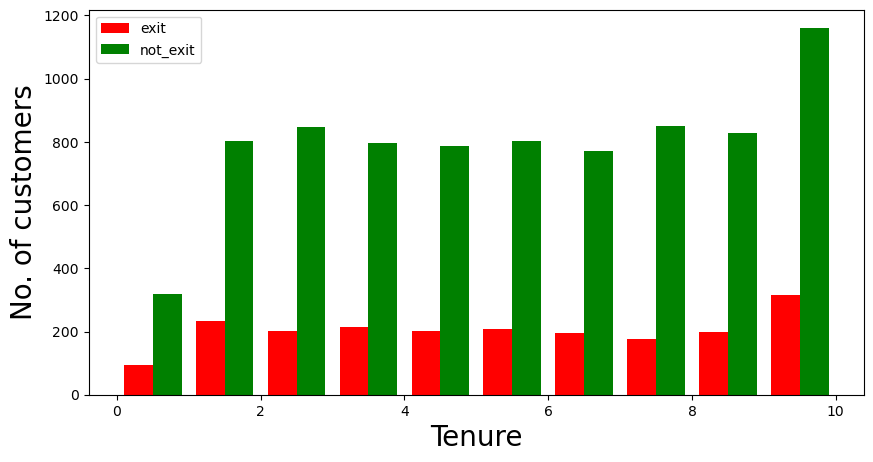

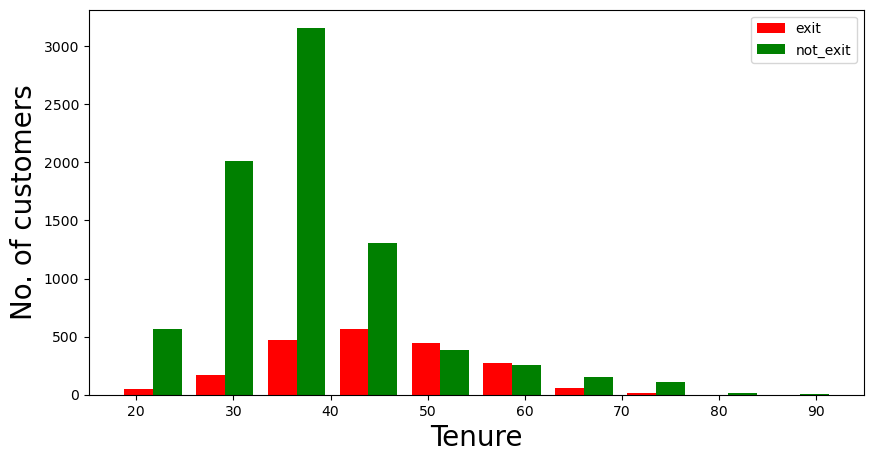

In [8]:
#one hot encoding
df = pd.get_dummies(data = df, columns=['Geography'])
df.dtypes

df['Exited'].value_counts()

def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

#get in to temp fframe
df_exited = df[df['Exited']==1]['Tenure']
df_not_exited = df[df['Exited']==0]['Tenure']

visualization(df_exited, df_not_exited, "Tenure")

df_exited1 = df[df['Exited']==1]['Age']
df_not_exited1= df[df['Exited']==0]['Age']

visualization(df_exited1, df_not_exited1, "Tenure")

In [9]:
# Assuming you have imported the necessary libraries

from sklearn.preprocessing import MinMaxScaler

# Selecting the columns to scale
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Scaling the selected columns using MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Separating the outcome or target column
X = df.drop(['Exited'], axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
pip install tensorflow


  Using cached tensorflow-2.14.0-cp310-cp310-win_amd64.whl (2.1 kB)
     ------------------------------------ 284.1/284.1 MB 687.1 kB/s eta 0:00:00
     -------------------------------------- 413.2/413.2 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 605.5 kB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.8 MB/s eta 0:00:00
     ------------------------------------ 440.7/440.7 kB 706.8 kB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 

In [23]:
from tensorflow import keras

# Assuming X_train and y_train are properly defined

# Define the model
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 5s 6ms/step - loss: 0.5015 - accuracy: 0.7820
Epoch 2/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4439 - accuracy: 0.8008
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4233 - accuracy: 0.8158
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4036 - accuracy: 0.8309
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3829 - accuracy: 0.8410
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3675 - accuracy: 0.8485
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3575 - accuracy: 0.8518
Epoch 8/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3514 - accuracy: 0.8551
Epoch 9/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3470 - accuracy: 0.8584
Epoch 10/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3436 - accura

In [25]:
model.evaluate(X_test,y_test)
yp=model.predict(X_test)

63/63 [==============================] - 1s 5ms/step


In [26]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have defined the variables y_test and y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.68      0.56      0.61       405

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [28]:
import tensorflow as tf
tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1491,  104],
       [ 180,  225]])>